## CUSTOMER SEGMENTATION AND CLUSTERING ANALYSIS

In this notebook we will be doing customer segmentation with the help of various clustering methods on the mall customer dataset. We will be plotting various plots such as scatter plot, box plot, elbow plot, etc. We will be calculating Silhouette score and Davies Bouldin score for K-Means and DBSCAN methods. 

### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Exploring the dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Visualizing the dataset

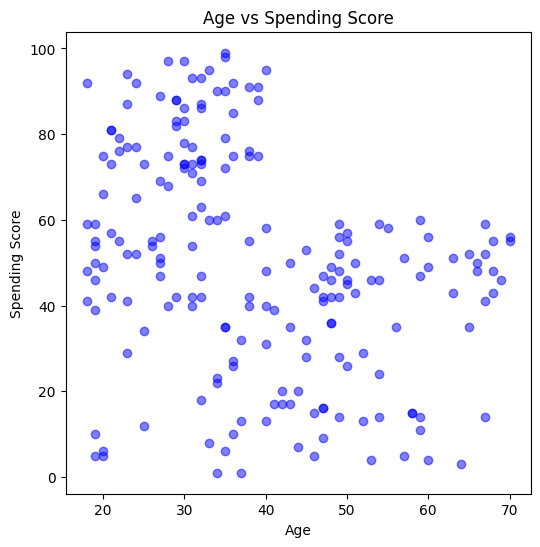

In [5]:
plt.figure(figsize=(6,6))
plt.scatter(df['Age'],df['Spending Score (1-100)'],c='blue',alpha=0.5)
plt.title("Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

In [6]:
data={
    'Age':df["Age"],
    'Spending_Score':df['Spending Score (1-100)']
}

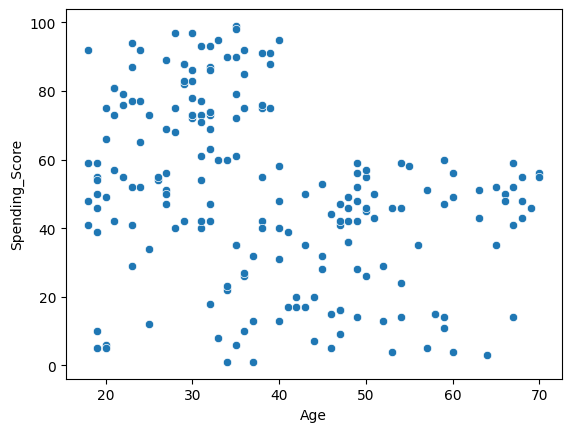

In [7]:
sns.scatterplot(x='Age',y='Spending_Score',data=data)
plt.show()

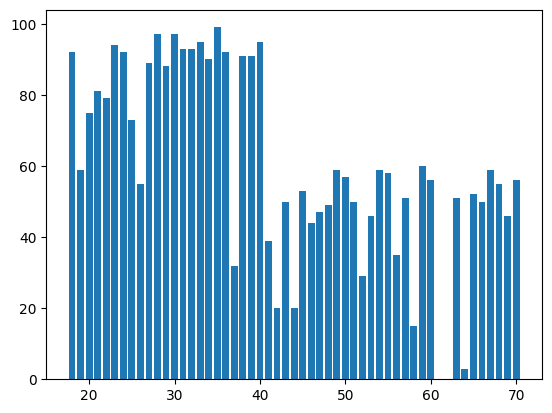

In [8]:
plt.bar(df['Age'],df['Spending Score (1-100)'])
plt.show()

Note: From the above visualisation we have found that people with age between 18 to 40 has high spending score. This age group people buys more number of products than others.

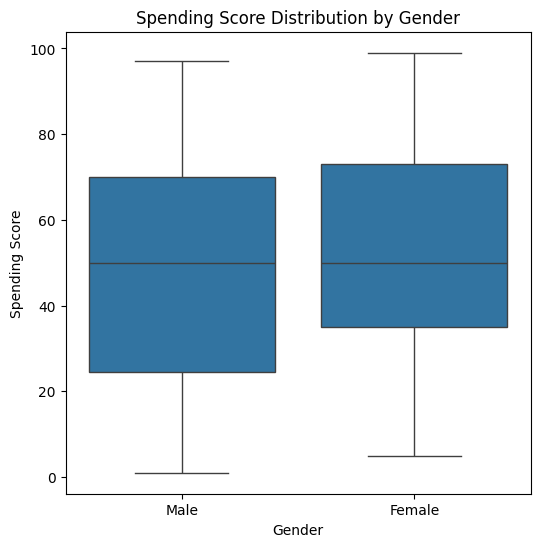

In [9]:
data_1={
    'Gender':df['Gender'],
    'Spending_Score':df['Spending Score (1-100)']
}

plt.figure(figsize=(6,6))
sns.boxplot(x='Gender',y='Spending_Score',data=data_1)
plt.title("Spending Score Distribution by Gender")
plt.ylabel("Spending Score")
plt.xlabel("Gender")
plt.show()

Note: From above visualisation we had made a conclusion that female buy more products than male or female buys expensive products than male.

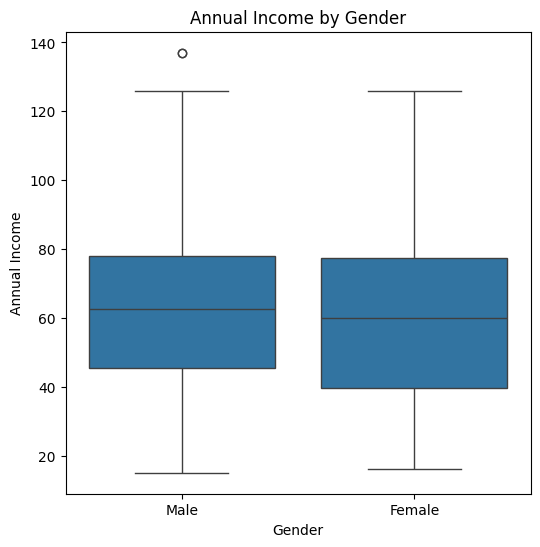

In [10]:
data_2={
    "Gender":df['Gender'],
    'Annual Income':df['Annual Income (k$)']
}
plt.figure(figsize=(6,6))
sns.boxplot(x='Gender',y='Annual Income',data=data_2)
plt.title("Annual Income by Gender")
plt.ylabel("Annual Income")
plt.xlabel("Gender")
plt.show()

Annual Incomes of males is higher than of female. But the Spending Score is opposite of that. We found one outlier which has very high incomes.

In [11]:
df[df['Annual Income (k$)']>130]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


### Elbow Plot

In [12]:
# Selecting features for clustering 
X=df[['Annual Income (k$)','Spending Score (1-100)']]

In [13]:
# Elbow method to find the optimal number of clusters
wcss=[] #within clusters sum of squares
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

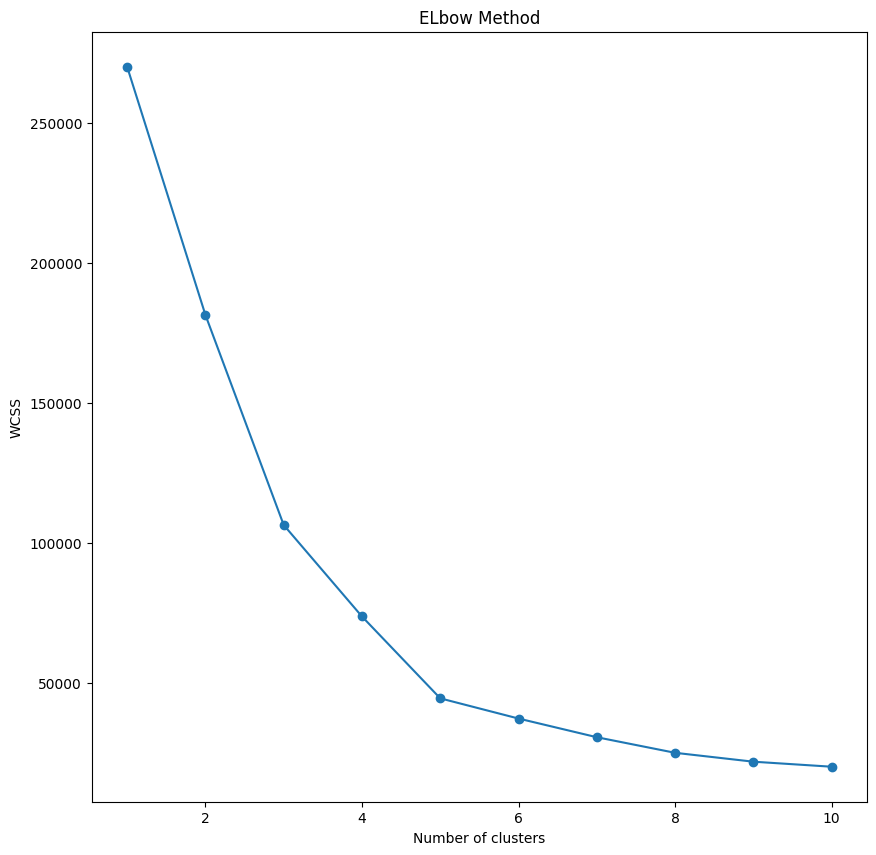

In [14]:
#Plot the elbow method
plt.figure(figsize=(10,10))
plt.plot(range(1,11),wcss,marker='o')
plt.title("ELbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

From above visualisation plot between number of clusters and wcss(within cluster sum of squares)

• Optimal clusters = 5

### K-Means 

In [15]:
#Applying Kmeans clustering to the dataset
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=1)
y_kmeans=kmeans.fit_predict(X)

#Inertia (wcss)
inertia=kmeans.inertia_
print(f"Inertia:{inertia}")

Inertia:44448.45544793371


In [16]:
from sklearn.metrics import silhouette_score
#sillhouette Scores
silhouette_avg=silhouette_score(X,y_kmeans)
silhouette_avg

0.553931997444648

A score of 0.5539 is moderately high and indicates that your clusters are reasonably well-defined.

In [17]:
from sklearn.metrics import davies_bouldin_score
#Calculate Davies Bouldin Index
dbi=davies_bouldin_score(X,y_kmeans)
print(f"Davies Bouldin Score:{dbi}")

Davies Bouldin Score:0.5725628995597082


Good Clustering: A score of 0.5726 is relatively low ,which means clusters are fairly compact and well-separated from one another. This indicates good clusterring performance.

In [18]:
df['Cluster']=y_kmeans

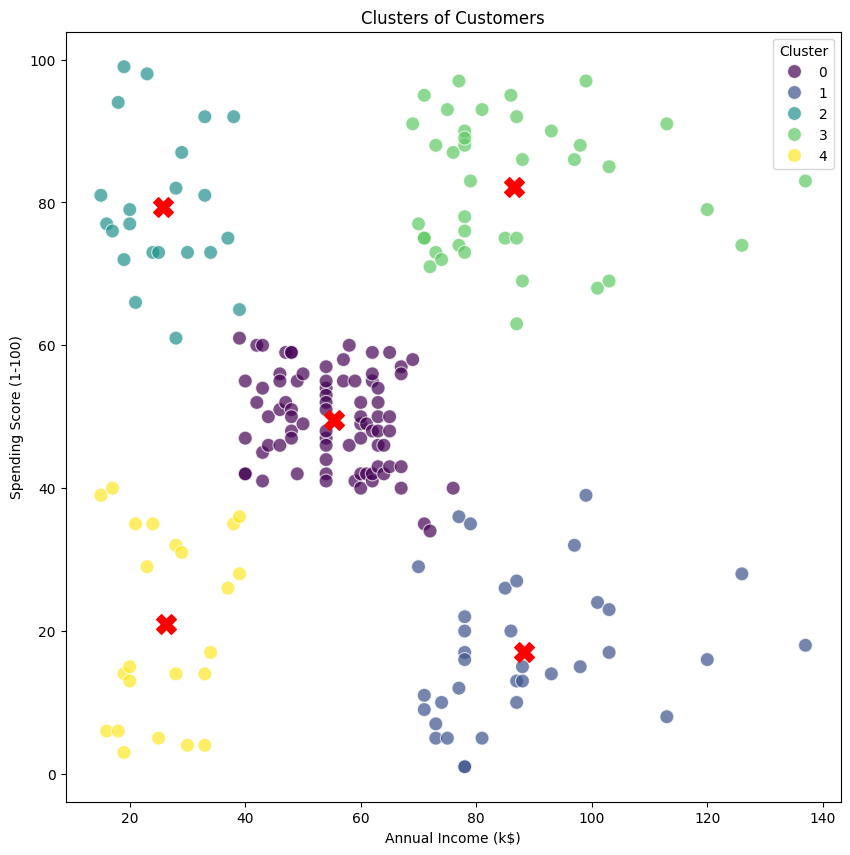

In [19]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Cluster',palette='viridis',s=100,alpha=0.7)

# Plotting clusters centers
center=kmeans.cluster_centers_
plt.scatter(center[:,0],center[:,1],c='red',s=200,marker='X',label='Centroids')

plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

### Agglomerative Clustering

In [20]:
dataset_1=df.drop(['Gender'],axis=1)

In [21]:
from sklearn.cluster import AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import StandardScaler

#Normalise the data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(dataset_1)

In [22]:
from sklearn.cluster import AgglomerativeClustering 

#Perform Agglomerative Hierarchical Clustering
agg_cluster=AgglomerativeClustering(n_clusters=5)
clusters_agg=agg_cluster.fit_predict(X_scaled)

#Add the cluster labels to the original DataFrame
dataset_1['cluster_agg']=clusters_agg

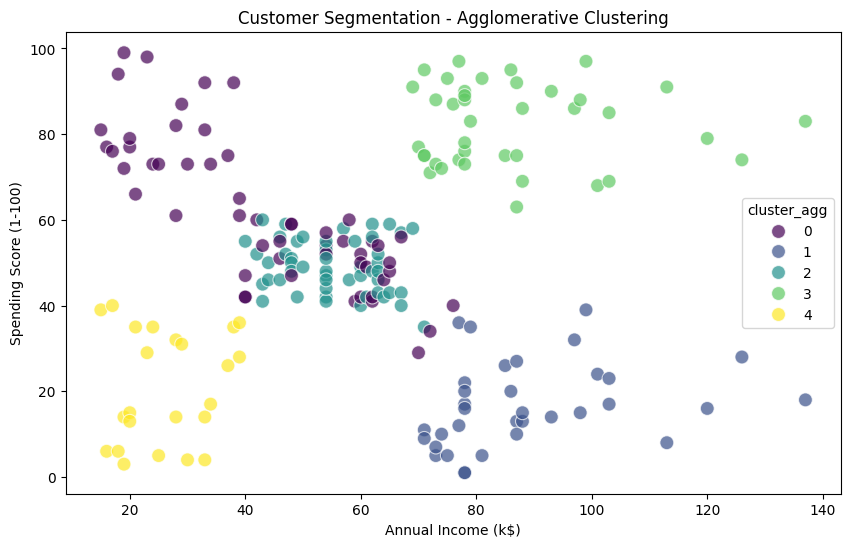

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dataset_1,x='Annual Income (k$)',y='Spending Score (1-100)',hue='cluster_agg',palette='viridis',s=100,alpha=0.7)
plt.title("Customer Segmentation - Agglomerative Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [24]:
#Evaluate the clustering performance
silhouette_avg_agg=silhouette_score(X_scaled,clusters_agg)
davies_bouldin_avg_agg=davies_bouldin_score(X_scaled,clusters_agg)

print(f'Agglomerative Clustering - Silhouette Score:{silhouette_avg_agg}')
print(f"Agglomerative Clustering - Devies Bouldin Score:{davies_bouldin_avg_agg}")

Agglomerative Clustering - Silhouette Score:0.4811924073087426
Agglomerative Clustering - Devies Bouldin Score:0.8139729854796591


From above evaluation we only conclude that clusters has moderately separation between the clusters but not as distinct as ideally desired.

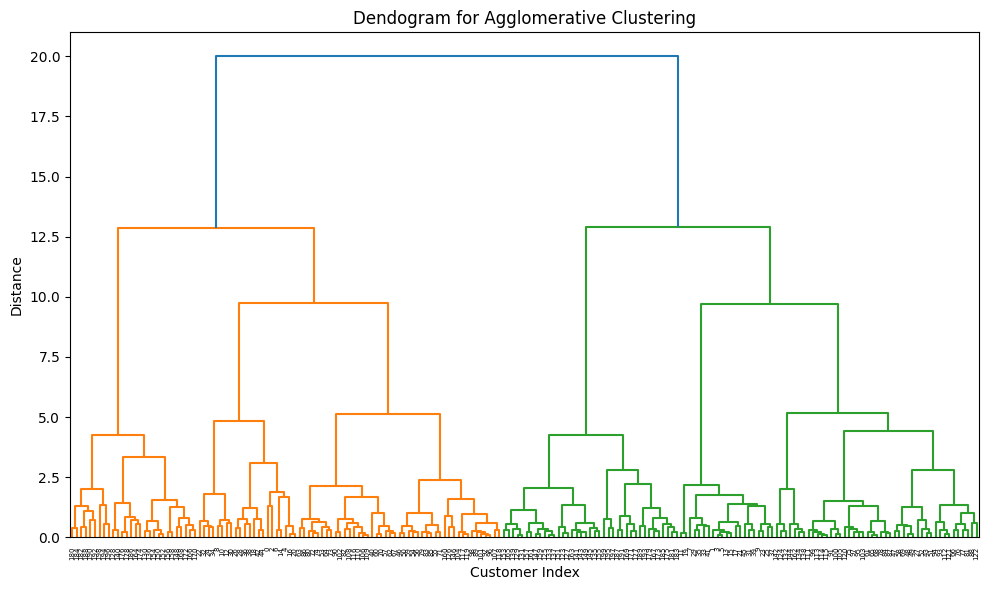

In [25]:
from scipy.cluster.hierarchy import dendrogram,linkage

#Select the relvant columns for clustering 
X=df[['Age','Annual Income (k$)','Spending Score (1-100)']]

#Normalise the data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

# Perform Agglomerative Clustering to obtain the linkage matrix
Z=linkage(X_scaled,method='ward',metric='euclidean')

#Plot the dendogram
plt.figure(figsize=(10,6))
dendrogram(Z,labels=df.index.values,orientation='top')
plt.title("Dendogram for Agglomerative Clustering")
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### DBSCAN

In [26]:
from sklearn.cluster import DBSCAN

#Perform DBSCAN Clustering
dbscan=DBSCAN(eps=0.5,min_samples=5)
clusters_dbscan=dbscan.fit_predict(X_scaled)

#Add the cluster labels to the original dataframe
dataset_1['Cluster_DBSCAN']=clusters_dbscan

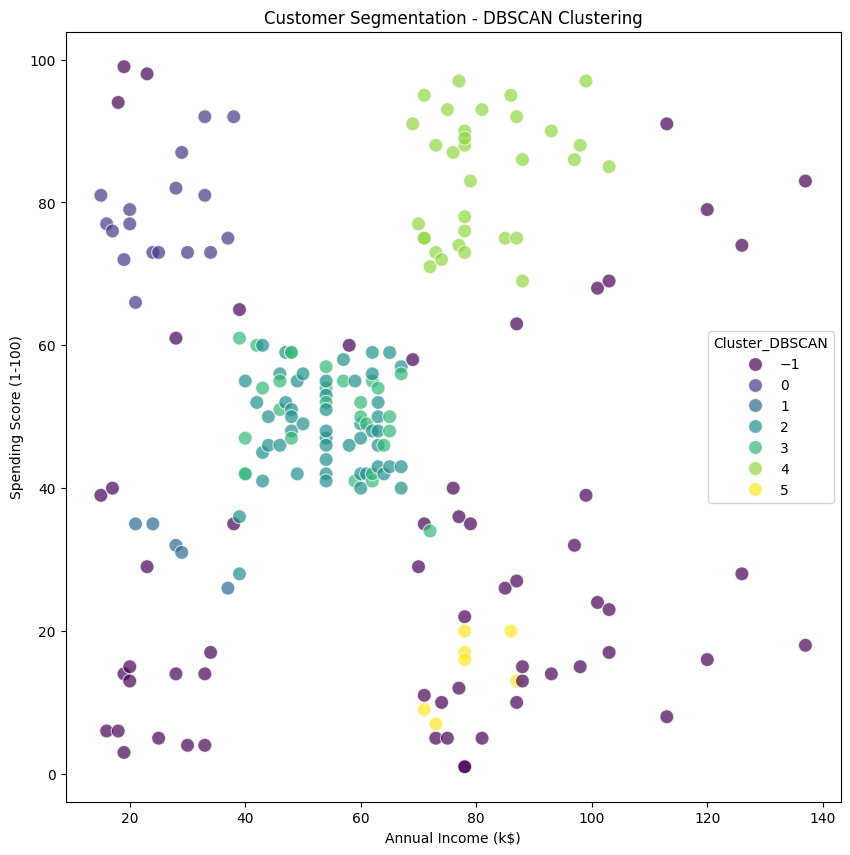

In [27]:
#Visualise the clusters 
plt.figure(figsize=(10,10))
sns.scatterplot(data=dataset_1,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Cluster_DBSCAN',palette='viridis',s=100,alpha=0.7)
plt.title("Customer Segmentation - DBSCAN Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

It does not properly distinct clusters because it make custers on basis of sample points nearer to each other.
Those datapoints are closer to another comes under same cluster but here see overlapping of points of different clusters.

In [28]:
#Evaluate Clustering performance 
davies_bouldin_avg_dbscan=davies_bouldin_score(X_scaled,clusters_dbscan)

print(f"Davies Bouldin Score:{davies_bouldin_avg_dbscan}")

Davies Bouldin Score:1.7569458461701164


The Davies Bouldin Score measures the avg similarity between each cluster and its most similar cluster.
A score of 1.756 suggests that there moderate overlap or similarity between clusters indicating that the clusters might not be well-separated as desired.

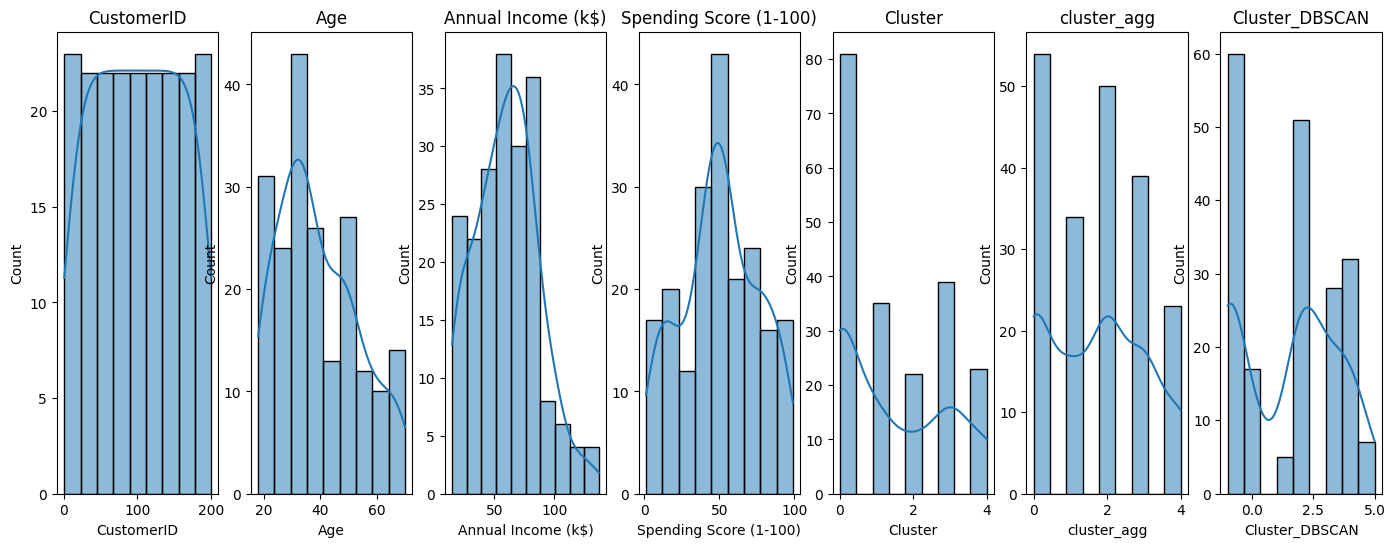

In [29]:
#Visual Inspection using Histogram and Density plots
plt.figure(figsize=(500,6))
for i,col in enumerate(dataset_1.columns):
    plt.subplot(1,len(dataset_1),i+1)
    sns.histplot(dataset_1[col],kde=True)
    plt.title(col)
plt.show()

### Q-Q Plot

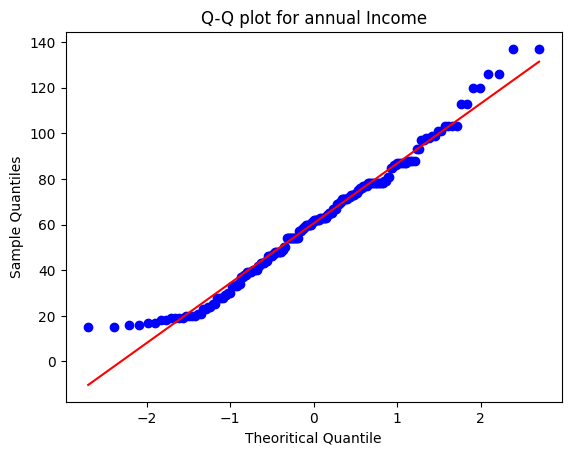

In [30]:
#Quantile-Quantile plot
import scipy.stats as stats
import matplotlib.pyplot as plt

#Example Q-Q plot for one column 
stats.probplot(dataset_1['Annual Income (k$)'],dist='norm',plot=plt)
plt.title("Q-Q plot for annual Income")
plt.xlabel("Theoritical Quantile")
plt.ylabel("Sample Quantiles")
plt.show()

Points lying close to the diagonal line indicate that the data follows a normal distribution

In [31]:
# Statistical test
from scipy.stats import shapiro,normaltest

#Example of shapiro-wilk test for normally 
stats,p=shapiro(dataset_1['Annual Income (k$)'])
print(f"Shapiro-Wilk Test - p-values:{p}")

#Example of kolmogorov-smirnov test for normality
stats,p=normaltest(dataset_1['Annual Income (k$)'])
print(f"Kolmogorov-smirnov Test - p-values:{p}")

Shapiro-Wilk Test - p-values:0.003537340322509408
Kolmogorov-smirnov Test - p-values:0.17282121541298148


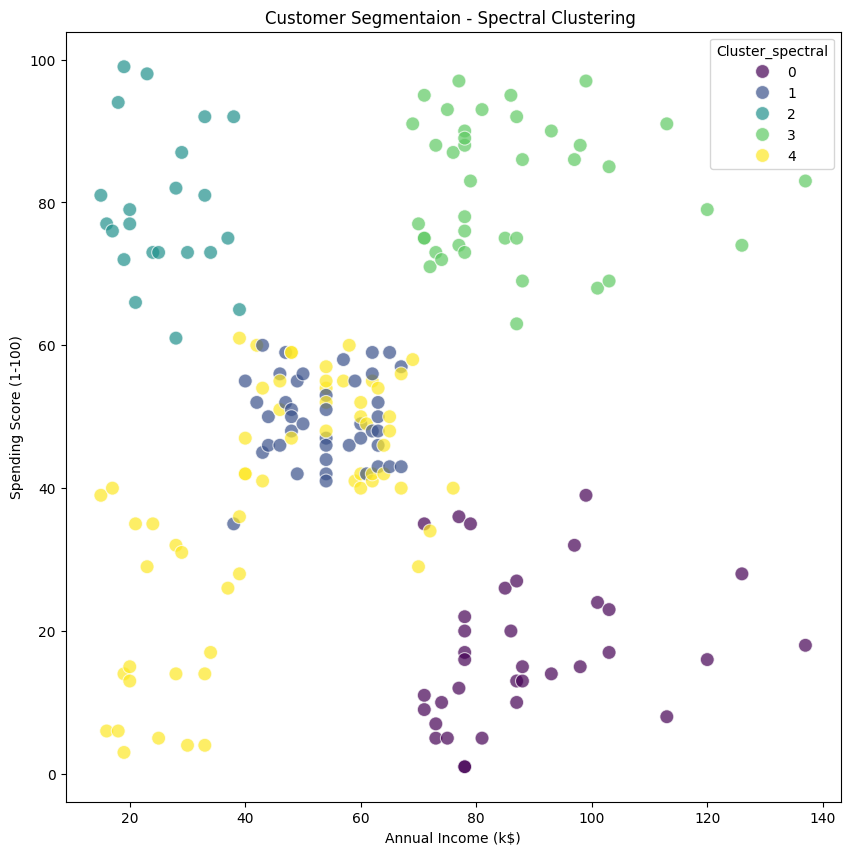

In [32]:
from sklearn.cluster import SpectralClustering

#Perform Spectrl clustering
spectral_cluster=SpectralClustering(n_clusters=5,affinity='nearest_neighbors',random_state=1)
clusters_spectral=spectral_cluster.fit_predict(X_scaled)

#Add the clusters labels to the original dataframe
dataset_1['Cluster_spectral']=clusters_spectral

#Visualise the clusters
plt.figure(figsize=(10,10))
sns.scatterplot(data=dataset_1,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Cluster_spectral',palette='viridis',s=100,alpha=0.7)
plt.title("Customer Segmentaion - Spectral Clustering ")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

Now concluding that we have applied many unsupervised learning algorithms like K-means clustering,Agglomerative and Spectral Clustering.
Evaluate models performance various metrics like Silhouette Score, Davies Bouldin Score and calinski Harabasz Score and etc.
Visualize each every aspects and features of dataset using plots like scatterplot,histplot,and etc.
Analysis 0f different features and how they are dependent of each other and which are most important ones.
Distinct clusters are formed using k-means clustering alogrithhm. We have found that optimal clusters for the dataset must be 5 using elbow method.